In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import sklearn as skl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
import tensorboard
from keras.optimizers import SGD
import keras.backend as K

/home/adrien/anaconda3/envs/GPI770/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/adrien/anaconda3/envs/GPI770/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/adrien/anaconda3/envs/GPI770/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/adrien/anaconda3/envs/GPI770/lib/python3

In [2]:
def read_csv(url):
    """
    Args:
        url (string): the url of the file
    Returns:
        df: the dataframe filled
    """
    df = pd.read_csv(url, header=None)
    df.head()
    return df

In [3]:
from sklearn.neighbors import RadiusNeighborsClassifier
def KnnAddedFeatures(X,Y):
    """
    Args :
        X, features, Y labels 
    Returns :
        tuples corresponding to new features

    """ 
    
    knn = RadiusNeighborsClassifier(radius=0.5, weights = 'distance')
    knn.fit(X,Y)
    a = knn.predict(X)
    print("coucou",a)
    
    

In [4]:
from sklearn.naive_bayes import MultinomialNB
def NaiveAddedFeatures(X,y):
    clf = MultinomialNB()
    clf.fit(abs(X), y)
    res = clf.predict_proba(X)
    return res
    

In [5]:
music_class_binary = {'BIG_BAND':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
          'BLUES_CONTEMPORARY':  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
          'COUNTRY_TRADITIONAL': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
          'DANCE':               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
          'ELECTRONICA':         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
          'EXPERIMENTAL':        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
          'FOLK_INTERNATIONAL':  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
          'GOSPEL':              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
          'GRUNGE_EMO':          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
          'HIP_HOP_RAP':         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'JAZZ_CLASSIC':        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'METAL_ALTERNATIVE':   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'METAL_DEATH':         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'METAL_HEAVY':         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'POP_CONTEMPORARY':    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'POP_INDIE':           [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'POP_LATIN':           [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'PUNK':                [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'REGGAE':              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'RNB_SOUL':            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_ALTERNATIVE':    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_COLLEGE':        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_CONTEMPORARY':   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_HARD':           [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_NEO_PSYCHEDELIA':[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [6]:
music_class_discrete_to_binary = {1:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                                  2:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                                  3:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                                  4:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                                  5:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                                  6:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                  7:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                                  8:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                  9:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                 10:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 11:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 12:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 13:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 14:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 15:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 16:[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 17:[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 18:[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 19:[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 20:[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 21:[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 22:[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 23:[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 24:[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 25:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [7]:
music_class = {'BIG_BAND':1,
          'BLUES_CONTEMPORARY':2,
          'COUNTRY_TRADITIONAL':3,
          'DANCE':4,
          'ELECTRONICA':5,
          'EXPERIMENTAL':6,
          'FOLK_INTERNATIONAL':7,
          'GOSPEL':8,
          'GRUNGE_EMO':9,
          'HIP_HOP_RAP':10,
          'JAZZ_CLASSIC':11,
          'METAL_ALTERNATIVE':12,
          'METAL_DEATH':13,
          'METAL_HEAVY':14,
          'POP_CONTEMPORARY':15,
          'POP_INDIE':16,
          'POP_LATIN':17,
          'PUNK':18,
          'REGGAE':19,
          'RNB_SOUL':20,
          'ROCK_ALTERNATIVE':21,
          'ROCK_COLLEGE':22,
          'ROCK_CONTEMPORARY':23,
          'ROCK_HARD':24,
          'ROCK_NEO_PSYCHEDELIA':25}

In [8]:
#Custom metrics function to calculate the F1 score
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [10]:
def CreateMultiPerceptron(nb_layers,nb_perceptron,nb_iteration,learning_rate,nb_essai,path):
    
    
    #Extraire les données des ensembles 
    dataset = read_csv(path)
    dataset.head()
    #print(dataset.shape[1])
    labels = dataset.loc[:,dataset.columns == (dataset.shape[1]-1)]
    labels = labels.to_numpy()
    y = []
    y_u = []
    for e in labels:
        y.append(music_class[e[0]])
    
    dataset = dataset.drop([0,1,(dataset.shape[1]-1)],axis=1)
    
    X = dataset.to_numpy()
    y = np.array(y)
    
    #Create a Multinomial Classifier
    mlt = MultinomialNB()
    
    #Train the classifier over all the samples
    mlt.fit(abs(X),y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    #Predict probabilities which will become new features over each data set
    nf_train = mlt.predict_proba(X_train)
    nf_test = mlt.predict_proba(X_test)
    
    # scale the data : réduire le execution time
    scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
    X_train = scaling.transform(X_train)
    X_test = scaling.transform(X_test)
    
    #Add of new features 
    X_train = np.concatenate((X_train,nf_train),axis=1)
    X_test = np.concatenate((X_test,nf_test),axis=1)
    
    y_train_binary = []
    for e in y_train:
        y_train_binary.append(music_class_discrete_to_binary[e])
    
    y_train_binary = np.array(y_train_binary)
    

        
    y_test_binary = []
    for e in y_test:
        y_test_binary.append(music_class_discrete_to_binary[e])
        
    y_test_binary = np.array(y_test_binary)
    y_test = y_test_binary
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_binary, test_size=0.20)
    #X_val = scaling.transform(X_val)
    
    
    #Create the model 
    model = Sequential()
    #First hidden layer with specified number of percpetrons 
    model.add(Dense(units=nb_perceptron, activation='relu', input_dim = X_train.shape[1]))
    
    for i in range(nb_layers-1):
        #Next hidden layers with specified number of percpetrons 
        model.add(Dense(units=nb_perceptron, activation='relu'))
    
    #Last layer, the activation layer with 2 outputs
    model.add(Dense(units = 25, activation='softmax'))
    
    #Compile the model
    sgd = SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy',f1])
    
    #3. Entraîner 

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=nb_iteration, batch_size=100)
    
    # Plot training & validation accuracy values
    accuracy = pd.DataFrame(history.history['accuracy'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    print("Accuracy")
    print(accuracy.head(nb_iteration))
    
    # Plot training & validation loss values
    f1score = pd.DataFrame(history.history['f1'])
    plt.plot(history.history['f1'])
    plt.plot(history.history['val_f1'])
    plt.title('Model F1 score')
    plt.ylabel('F1 score')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    print("F1 score")
    print(f1score.head(nb_iteration))
    
    
    #4 Evaluer le modèle
    score = model.evaluate(X_test, y_test)
    print("---TEST---")
    print(score)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.8635 - accuracy: 0.1429 - f1: 1.0331e-04 - val_loss: 2.8117 - val_accuracy: 0.1571 - val_f1: 0.0011
Epoch 2/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.7875 - accuracy: 0.1617 - f1: 0.0019 - val_loss: 2.7906 - val_accuracy: 0.1579 - val_f1: 0.0029
Epoch 3/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.7594 - accuracy: 0.1680 - f1: 0.0038 - val_loss: 2.7498 - val_accuracy: 0.1742 - val_f1: 0.0095
Epoch 4/100
114915/114915 [==============================] - 3s 30us/step - loss: 2.7390 - accuracy: 0.1731 - f1: 0.0065 - val_loss: 2.7377 - val_accuracy: 0.1752 - val_f1: 0.0055
Epoch 5/100
114915/114915 [==============================] - 5s 44us/step - loss: 2.7243 - accuracy: 0.17

Epoch 43/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.5686 - accuracy: 0.2173 - f1: 0.0463 - val_loss: 2.6752 - val_accuracy: 0.1975 - val_f1: 0.0402
Epoch 44/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.5671 - accuracy: 0.2171 - f1: 0.0448 - val_loss: 2.6767 - val_accuracy: 0.1968 - val_f1: 0.0378
Epoch 45/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.5644 - accuracy: 0.2190 - f1: 0.0475 - val_loss: 2.6865 - val_accuracy: 0.1954 - val_f1: 0.0474
Epoch 46/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.5620 - accuracy: 0.2187 - f1: 0.0474 - val_loss: 2.6806 - val_accuracy: 0.1943 - val_f1: 0.0364
Epoch 47/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.5609 - accuracy: 0.2185 - f1: 0.0478 - val_loss: 2.6814 - val_accuracy: 0.1963 - val_f1: 0.0506
Epoch 48/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.5584 - acc

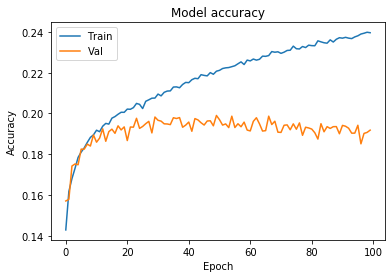

Accuracy
           0
0   0.142853
1   0.161711
2   0.168011
3   0.173067
4   0.178428
..       ...
95  0.238133
96  0.239003
97  0.239394
98  0.239882
99  0.239647

[100 rows x 1 columns]


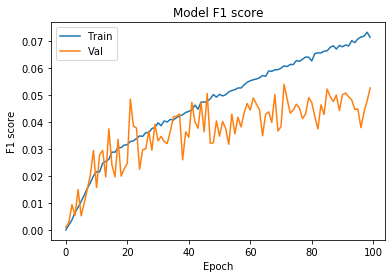

F1 score
           0
0   0.000103
1   0.001936
2   0.003797
3   0.006526
4   0.008479
..       ...
95  0.070878
96  0.071574
97  0.071879
98  0.073339
99  0.071500

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 20us/step
---TEST---
[2.72858106982774, 0.19520480930805206, 0.051432520151138306]


In [11]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,1,"../music/music/tagged_feature_sets/msd-jmirmoments_dev/msd-jmirmoments_dev.csv") 

Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 5s 43us/step - loss: 2.9894 - accuracy: 0.1224 - f1: 0.0307 - val_loss: 2.9025 - val_accuracy: 0.1481 - val_f1: 0.0366
Epoch 2/100
114915/114915 [==============================] - 5s 42us/step - loss: 2.8579 - accuracy: 0.1556 - f1: 0.0500 - val_loss: 2.8248 - val_accuracy: 0.1631 - val_f1: 0.0557
Epoch 3/100
114915/114915 [==============================] - 5s 41us/step - loss: 2.8030 - accuracy: 0.1690 - f1: 0.0545 - val_loss: 2.8069 - val_accuracy: 0.1695 - val_f1: 0.0459
Epoch 4/100
114915/114915 [==============================] - 5s 42us/step - loss: 2.7830 - accuracy: 0.1739 - f1: 0.0554 - val_loss: 2.7778 - val_accuracy: 0.1756 - val_f1: 0.0455
Epoch 5/100
114915/114915 [==============================] - 5s 41us/step - loss: 2.7657 - accuracy: 0.1762 - f1: 0.0576 - val_loss: 2.7552 - val_accuracy: 0.1821 - val_f1: 0.0578
Epoch 6/100
114915/114915 [======================

114915/114915 [==============================] - 5s 41us/step - loss: 2.5993 - accuracy: 0.2156 - f1: 0.0808 - val_loss: 2.6847 - val_accuracy: 0.2029 - val_f1: 0.0843
Epoch 47/100
114915/114915 [==============================] - 5s 41us/step - loss: 2.5963 - accuracy: 0.2174 - f1: 0.0801 - val_loss: 2.6833 - val_accuracy: 0.2007 - val_f1: 0.0902
Epoch 48/100
114915/114915 [==============================] - 5s 42us/step - loss: 2.5975 - accuracy: 0.2168 - f1: 0.0809 - val_loss: 2.6495 - val_accuracy: 0.2096 - val_f1: 0.0787
Epoch 49/100
114915/114915 [==============================] - 5s 41us/step - loss: 2.5955 - accuracy: 0.2170 - f1: 0.0820 - val_loss: 2.6558 - val_accuracy: 0.2036 - val_f1: 0.0800
Epoch 50/100
114915/114915 [==============================] - 5s 41us/step - loss: 2.5931 - accuracy: 0.2176 - f1: 0.0823 - val_loss: 2.6662 - val_accuracy: 0.2047 - val_f1: 0.0704
Epoch 51/100
114915/114915 [==============================] - 5s 41us/step - loss: 2.5869 - accuracy: 0.2202

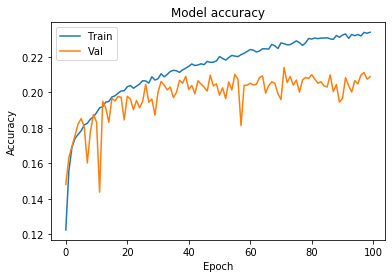

Accuracy
           0
0   0.122377
1   0.155637
2   0.168986
3   0.173937
4   0.176226
..       ...
95  0.232598
96  0.231771
97  0.233755
98  0.233312
99  0.233851

[100 rows x 1 columns]


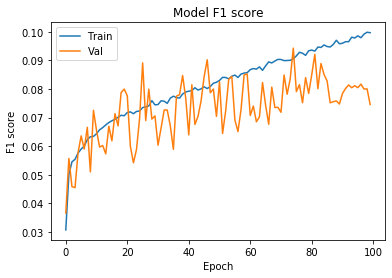

F1 score
           0
0   0.030722
1   0.049981
2   0.054505
3   0.055401
4   0.057624
..       ...
95  0.098576
96  0.097906
97  0.099175
98  0.099831
99  0.099679

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 28us/step
---TEST---
[2.646303652933621, 0.21283172070980072, 0.07586974650621414]


In [12]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,2,"../music/music/tagged_feature_sets/msd-mvd_dev/msd-mvd_dev.csv") 

Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 4s 36us/step - loss: 2.6892 - accuracy: 0.1831 - f1: 0.0265 - val_loss: 2.6041 - val_accuracy: 0.2077 - val_f1: 0.0581
Epoch 2/100
114915/114915 [==============================] - 4s 33us/step - loss: 2.5614 - accuracy: 0.2170 - f1: 0.0495 - val_loss: 2.5453 - val_accuracy: 0.2235 - val_f1: 0.0451
Epoch 3/100
114915/114915 [==============================] - 4s 33us/step - loss: 2.5225 - accuracy: 0.2279 - f1: 0.0583 - val_loss: 2.5342 - val_accuracy: 0.2256 - val_f1: 0.0690
Epoch 4/100
114915/114915 [==============================] - 4s 33us/step - loss: 2.4964 - accuracy: 0.2355 - f1: 0.0664 - val_loss: 2.4934 - val_accuracy: 0.2389 - val_f1: 0.0770
Epoch 5/100
114915/114915 [==============================] - 4s 34us/step - loss: 2.4741 - accuracy: 0.2421 - f1: 0.0730 - val_loss: 2.5100 - val_accuracy: 0.2404 - val_f1: 0.0532
Epoch 6/100
114915/114915 [======================

114915/114915 [==============================] - 3s 26us/step - loss: 2.2429 - accuracy: 0.3038 - f1: 0.1542 - val_loss: 2.3891 - val_accuracy: 0.2743 - val_f1: 0.1400
Epoch 47/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.2394 - accuracy: 0.3057 - f1: 0.1556 - val_loss: 2.3817 - val_accuracy: 0.2736 - val_f1: 0.1379
Epoch 48/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.2362 - accuracy: 0.3071 - f1: 0.1579 - val_loss: 2.3982 - val_accuracy: 0.2701 - val_f1: 0.1266
Epoch 49/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.2346 - accuracy: 0.3060 - f1: 0.1573 - val_loss: 2.3859 - val_accuracy: 0.2744 - val_f1: 0.1417
Epoch 50/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.2296 - accuracy: 0.3070 - f1: 0.1602 - val_loss: 2.3983 - val_accuracy: 0.2714 - val_f1: 0.1341
Epoch 51/100
114915/114915 [==============================] - 4s 34us/step - loss: 2.2282 - accuracy: 0.3078

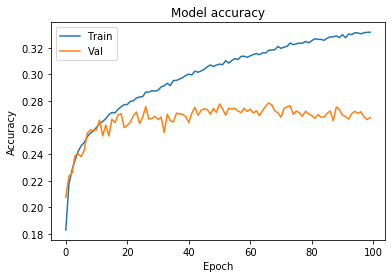

Accuracy
           0
0   0.183144
1   0.216969
2   0.227899
3   0.235478
4   0.242101
..       ...
95  0.331184
96  0.330514
97  0.331401
98  0.331619
99  0.331723

[100 rows x 1 columns]


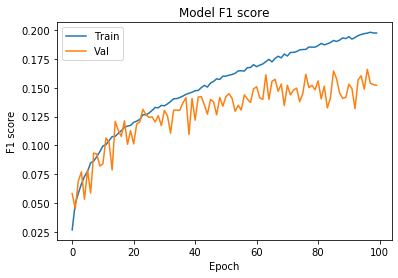

F1 score
           0
0   0.026548
1   0.049457
2   0.058329
3   0.066440
4   0.073002
..       ...
95  0.197129
96  0.197581
97  0.198344
98  0.197680
99  0.197691

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 23us/step
---TEST---
[2.4353956886608694, 0.2746512293815613, 0.1495947688817978]


In [13]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,3,"../music/music/tagged_feature_sets/msd-ssd_dev/msd-ssd_dev.csv") 

Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.8266 - accuracy: 0.1470 - f1: 0.0081 - val_loss: 2.7969 - val_accuracy: 0.1527 - val_f1: 0.0023
Epoch 2/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.7322 - accuracy: 0.1702 - f1: 0.0130 - val_loss: 2.7138 - val_accuracy: 0.1768 - val_f1: 0.0227
Epoch 3/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.6901 - accuracy: 0.1808 - f1: 0.0205 - val_loss: 2.6728 - val_accuracy: 0.1878 - val_f1: 0.0139
Epoch 4/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.6700 - accuracy: 0.1851 - f1: 0.0224 - val_loss: 2.6572 - val_accuracy: 0.1899 - val_f1: 0.0142
Epoch 5/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.6539 - accuracy: 0.1883 - f1: 0.0244 - val_loss: 2.6474 - val_accuracy: 0.1902 - val_f1: 0.0319
Epoch 6/100
114915/114915 [======================

114915/114915 [==============================] - 3s 26us/step - loss: 2.4762 - accuracy: 0.2403 - f1: 0.0683 - val_loss: 2.5772 - val_accuracy: 0.2167 - val_f1: 0.0440
Epoch 47/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.4747 - accuracy: 0.2405 - f1: 0.0694 - val_loss: 2.5903 - val_accuracy: 0.2124 - val_f1: 0.0698
Epoch 48/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.4729 - accuracy: 0.2403 - f1: 0.0702 - val_loss: 2.5629 - val_accuracy: 0.2201 - val_f1: 0.0599
Epoch 49/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.4705 - accuracy: 0.2404 - f1: 0.0708 - val_loss: 2.5928 - val_accuracy: 0.2148 - val_f1: 0.0665
Epoch 50/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.4693 - accuracy: 0.2401 - f1: 0.0705 - val_loss: 2.5764 - val_accuracy: 0.2134 - val_f1: 0.0662
Epoch 51/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.4645 - accuracy: 0.2421

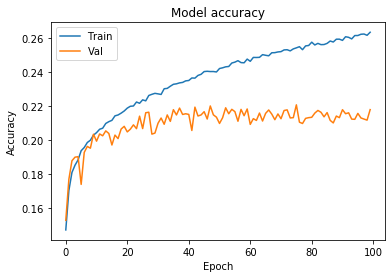

Accuracy
           0
0   0.147004
1   0.170195
2   0.180847
3   0.185146
4   0.188296
..       ...
95  0.261567
96  0.262316
97  0.262446
98  0.261706
99  0.263499

[100 rows x 1 columns]


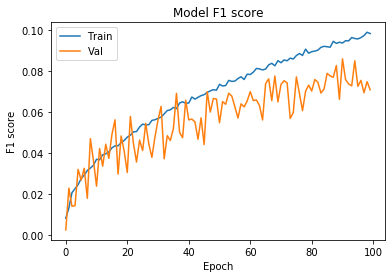

F1 score
           0
0   0.008054
1   0.013039
2   0.020471
3   0.022448
4   0.024430
..       ...
95  0.095541
96  0.096171
97  0.097194
98  0.098800
99  0.098147

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 20us/step
---TEST---
[2.5831375144975386, 0.22229957580566406, 0.07003853470087051]


In [14]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,4,"../music/music/tagged_feature_sets/msd-jmirspectral_dev/msd-jmirspectral_dev.csv") 

Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.8498 - accuracy: 0.1391 - f1: 0.0013 - val_loss: 2.7515 - val_accuracy: 0.1677 - val_f1: 0.0012
Epoch 2/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.7069 - accuracy: 0.1793 - f1: 0.0084 - val_loss: 2.6795 - val_accuracy: 0.1865 - val_f1: 0.0165
Epoch 3/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.6600 - accuracy: 0.1938 - f1: 0.0190 - val_loss: 2.6376 - val_accuracy: 0.1998 - val_f1: 0.0170
Epoch 4/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.6305 - accuracy: 0.2024 - f1: 0.0298 - val_loss: 2.6439 - val_accuracy: 0.1982 - val_f1: 0.0316
Epoch 5/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.6112 - accuracy: 0.2069 - f1: 0.0367 - val_loss: 2.6245 - val_accuracy: 0.2029 - val_f1: 0.0447
Epoch 6/100
114915/114915 [======================

114915/114915 [==============================] - 3s 27us/step - loss: 2.4217 - accuracy: 0.2586 - f1: 0.0873 - val_loss: 2.5206 - val_accuracy: 0.2339 - val_f1: 0.0942
Epoch 47/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.4151 - accuracy: 0.2603 - f1: 0.0902 - val_loss: 2.4962 - val_accuracy: 0.2401 - val_f1: 0.0708
Epoch 48/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.4159 - accuracy: 0.2600 - f1: 0.0896 - val_loss: 2.4930 - val_accuracy: 0.2432 - val_f1: 0.0818
Epoch 49/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.4119 - accuracy: 0.2611 - f1: 0.0901 - val_loss: 2.4875 - val_accuracy: 0.2451 - val_f1: 0.0970
Epoch 50/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.4090 - accuracy: 0.2625 - f1: 0.0913 - val_loss: 2.4975 - val_accuracy: 0.2389 - val_f1: 0.0809
Epoch 51/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.4087 - accuracy: 0.2624

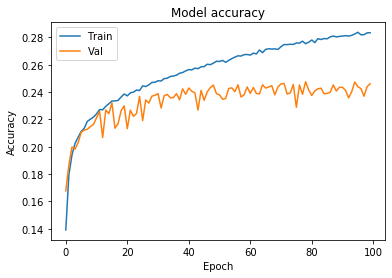

Accuracy
           0
0   0.139112
1   0.179350
2   0.193839
3   0.202384
4   0.206866
..       ...
95  0.283749
96  0.281895
97  0.281948
98  0.283296
99  0.283409

[100 rows x 1 columns]


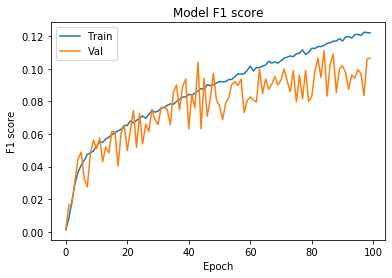

F1 score
           0
0   0.001270
1   0.008366
2   0.018984
3   0.029815
4   0.036746
..       ...
95  0.121020
96  0.120331
97  0.122305
98  0.122102
99  0.121954

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 20us/step
---TEST---
[2.505468017810442, 0.24808554351329803, 0.10394282639026642]


In [15]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,5,"../music/music/tagged_feature_sets/msd-jmirmfccs_dev/msd-jmirmfccs_dev.csv") 

Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 8s 66us/step - loss: 2.9825 - accuracy: 0.1242 - f1: 0.0218 - val_loss: 2.9192 - val_accuracy: 0.1450 - val_f1: 0.0583
Epoch 2/100
114915/114915 [==============================] - 5s 44us/step - loss: 2.8812 - accuracy: 0.1481 - f1: 0.0400 - val_loss: 2.8864 - val_accuracy: 0.1488 - val_f1: 0.0335
Epoch 3/100
114915/114915 [==============================] - 5s 39us/step - loss: 2.8446 - accuracy: 0.1576 - f1: 0.0434 - val_loss: 2.8132 - val_accuracy: 0.1660 - val_f1: 0.0453
Epoch 4/100
114915/114915 [==============================] - 4s 39us/step - loss: 2.8228 - accuracy: 0.1612 - f1: 0.0467 - val_loss: 2.8039 - val_accuracy: 0.1679 - val_f1: 0.0417
Epoch 5/100
114915/114915 [==============================] - 5s 39us/step - loss: 2.8024 - accuracy: 0.1658 - f1: 0.0490 - val_loss: 2.8166 - val_accuracy: 0.1611 - val_f1: 0.0527
Epoch 6/100
114915/114915 [======================

114915/114915 [==============================] - 5s 40us/step - loss: 2.6534 - accuracy: 0.2002 - f1: 0.0701 - val_loss: 2.7282 - val_accuracy: 0.1863 - val_f1: 0.0642
Epoch 47/100
114915/114915 [==============================] - 5s 41us/step - loss: 2.6521 - accuracy: 0.2011 - f1: 0.0700 - val_loss: 2.6931 - val_accuracy: 0.1932 - val_f1: 0.0675
Epoch 48/100
114915/114915 [==============================] - 5s 41us/step - loss: 2.6537 - accuracy: 0.2001 - f1: 0.0696 - val_loss: 2.7155 - val_accuracy: 0.1880 - val_f1: 0.0668
Epoch 49/100
114915/114915 [==============================] - 5s 40us/step - loss: 2.6535 - accuracy: 0.2000 - f1: 0.0697 - val_loss: 2.7321 - val_accuracy: 0.1883 - val_f1: 0.0706
Epoch 50/100
114915/114915 [==============================] - 5s 41us/step - loss: 2.6503 - accuracy: 0.2011 - f1: 0.0696 - val_loss: 2.6877 - val_accuracy: 0.1926 - val_f1: 0.0650
Epoch 51/100
114915/114915 [==============================] - 5s 40us/step - loss: 2.6507 - accuracy: 0.2003

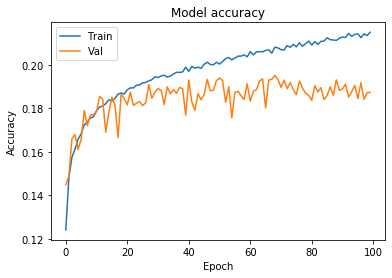

Accuracy
           0
0   0.124161
1   0.148075
2   0.157551
3   0.161215
4   0.165775
..       ...
95  0.214158
96  0.212392
97  0.214158
98  0.213384
99  0.214898

[100 rows x 1 columns]


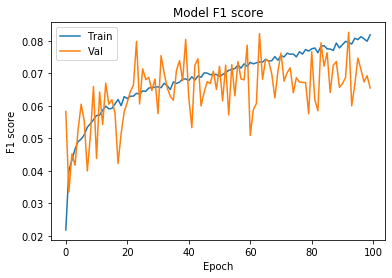

F1 score
           0
0   0.021845
1   0.040043
2   0.043409
3   0.046654
4   0.049030
..       ...
95  0.080346
96  0.081253
97  0.080614
98  0.079850
99  0.081841

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 27us/step
---TEST---
[2.718325661595797, 0.18832670152187347, 0.06563679128885269]


In [16]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,6,"../music/music/tagged_feature_sets/msd-trh_dev/msd-trh_dev.csv") 

Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 3s 30us/step - loss: 2.8080 - accuracy: 0.1572 - f1: 0.0024 - val_loss: 2.7356 - val_accuracy: 0.1723 - val_f1: 0.0102
Epoch 2/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.7104 - accuracy: 0.1830 - f1: 0.0101 - val_loss: 2.6867 - val_accuracy: 0.1877 - val_f1: 0.0094
Epoch 3/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.6784 - accuracy: 0.1915 - f1: 0.0177 - val_loss: 2.6739 - val_accuracy: 0.1930 - val_f1: 0.0196
Epoch 4/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.6600 - accuracy: 0.1962 - f1: 0.0246 - val_loss: 2.6550 - val_accuracy: 0.1941 - val_f1: 0.0191
Epoch 5/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.6470 - accuracy: 0.2004 - f1: 0.0294 - val_loss: 2.6647 - val_accuracy: 0.1939 - val_f1: 0.0455
Epoch 6/100
114915/114915 [======================

114915/114915 [==============================] - 3s 29us/step - loss: 2.4779 - accuracy: 0.2440 - f1: 0.0722 - val_loss: 2.6273 - val_accuracy: 0.2097 - val_f1: 0.0552
Epoch 47/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4739 - accuracy: 0.2453 - f1: 0.0737 - val_loss: 2.6267 - val_accuracy: 0.2108 - val_f1: 0.0451
Epoch 48/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.4729 - accuracy: 0.2459 - f1: 0.0723 - val_loss: 2.6290 - val_accuracy: 0.2094 - val_f1: 0.0638
Epoch 49/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.4700 - accuracy: 0.2461 - f1: 0.0743 - val_loss: 2.6261 - val_accuracy: 0.2090 - val_f1: 0.0546
Epoch 50/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.4691 - accuracy: 0.2481 - f1: 0.0737 - val_loss: 2.6236 - val_accuracy: 0.2105 - val_f1: 0.0569
Epoch 51/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.4670 - accuracy: 0.2475

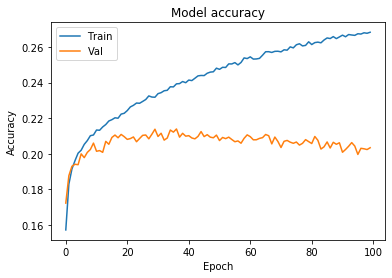

Accuracy
           0
0   0.157229
1   0.182979
2   0.191489
3   0.196180
4   0.200365
..       ...
95  0.267493
96  0.267319
97  0.268033
98  0.267763
99  0.268337

[100 rows x 1 columns]


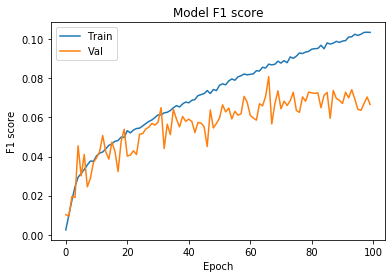

F1 score
           0
0   0.002441
1   0.010061
2   0.017674
3   0.024571
4   0.029397
..       ...
95  0.101959
96  0.102563
97  0.103518
98  0.103592
99  0.103521

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 19us/step
---TEST---
[2.6875176824944043, 0.21205201745033264, 0.06471770256757736]


In [17]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,7,"../music/music/tagged_feature_sets/msd-jmirlpc_dev/msd-jmirlpc_dev.csv") 

Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.9172 - accuracy: 0.1437 - f1: 0.0407 - val_loss: 2.8367 - val_accuracy: 0.1611 - val_f1: 0.0334
Epoch 2/100
114915/114915 [==============================] - 3s 29us/step - loss: 2.8144 - accuracy: 0.1671 - f1: 0.0510 - val_loss: 2.7988 - val_accuracy: 0.1669 - val_f1: 0.0534
Epoch 3/100
114915/114915 [==============================] - 3s 29us/step - loss: 2.7896 - accuracy: 0.1721 - f1: 0.0536 - val_loss: 2.7762 - val_accuracy: 0.1749 - val_f1: 0.0494
Epoch 4/100
114915/114915 [==============================] - 3s 29us/step - loss: 2.7720 - accuracy: 0.1740 - f1: 0.0549 - val_loss: 2.7535 - val_accuracy: 0.1769 - val_f1: 0.0551
Epoch 5/100
114915/114915 [==============================] - 3s 29us/step - loss: 2.7569 - accuracy: 0.1763 - f1: 0.0566 - val_loss: 2.7454 - val_accuracy: 0.1802 - val_f1: 0.0479
Epoch 6/100
114915/114915 [======================

114915/114915 [==============================] - 3s 29us/step - loss: 2.6270 - accuracy: 0.2055 - f1: 0.0762 - val_loss: 2.7076 - val_accuracy: 0.1907 - val_f1: 0.0655
Epoch 47/100
114915/114915 [==============================] - 3s 29us/step - loss: 2.6266 - accuracy: 0.2067 - f1: 0.0767 - val_loss: 2.7169 - val_accuracy: 0.1871 - val_f1: 0.0664
Epoch 48/100
114915/114915 [==============================] - 3s 29us/step - loss: 2.6260 - accuracy: 0.2062 - f1: 0.0775 - val_loss: 2.7286 - val_accuracy: 0.1867 - val_f1: 0.0676
Epoch 49/100
114915/114915 [==============================] - 3s 29us/step - loss: 2.6234 - accuracy: 0.2073 - f1: 0.0785 - val_loss: 2.7228 - val_accuracy: 0.1889 - val_f1: 0.0560
Epoch 50/100
114915/114915 [==============================] - 3s 29us/step - loss: 2.6219 - accuracy: 0.2073 - f1: 0.0782 - val_loss: 2.6990 - val_accuracy: 0.1965 - val_f1: 0.0633
Epoch 51/100
114915/114915 [==============================] - 3s 29us/step - loss: 2.6174 - accuracy: 0.2080

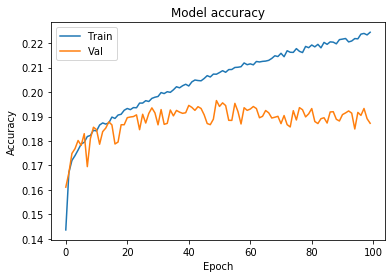

Accuracy
           0
0   0.143654
1   0.167106
2   0.172075
3   0.174024
4   0.176313
..       ...
95  0.221747
96  0.223670
97  0.223957
98  0.223356
99  0.224444

[100 rows x 1 columns]


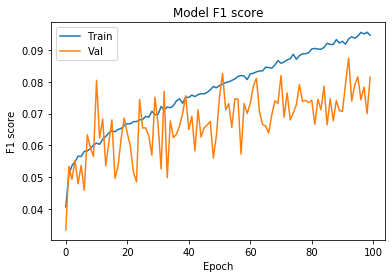

F1 score
           0
0   0.040692
1   0.050959
2   0.053635
3   0.054886
4   0.056591
..       ...
95  0.094448
96  0.095578
97  0.095086
98  0.095624
99  0.094693

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 21us/step
---TEST---
[2.7560139165938153, 0.1875748336315155, 0.0825614482164383]


In [18]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,8,"../music/music/tagged_feature_sets/msd-rh_dev_new/msd-rh_dev_new.csv") 

Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.7997 - accuracy: 0.1507 - f1: 0.0072 - val_loss: 2.7053 - val_accuracy: 0.1616 - val_f1: 0.0010
Epoch 2/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.6744 - accuracy: 0.1806 - f1: 0.0158 - val_loss: 2.7204 - val_accuracy: 0.1745 - val_f1: 0.0322
Epoch 3/100
114915/114915 [==============================] - 3s 30us/step - loss: 2.6346 - accuracy: 0.1925 - f1: 0.0261 - val_loss: 2.6152 - val_accuracy: 0.1983 - val_f1: 0.0358
Epoch 4/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.6078 - accuracy: 0.1984 - f1: 0.0313 - val_loss: 2.6081 - val_accuracy: 0.2028 - val_f1: 0.0194
Epoch 5/100
114915/114915 [==============================] - 3s 30us/step - loss: 2.5908 - accuracy: 0.2040 - f1: 0.0345 - val_loss: 2.6023 - val_accuracy: 0.2013 - val_f1: 0.0268
Epoch 6/100
114915/114915 [======================

114915/114915 [==============================] - 4s 31us/step - loss: 2.3994 - accuracy: 0.2565 - f1: 0.0914 - val_loss: 2.5130 - val_accuracy: 0.2341 - val_f1: 0.0914
Epoch 47/100
114915/114915 [==============================] - 3s 30us/step - loss: 2.3958 - accuracy: 0.2571 - f1: 0.0939 - val_loss: 2.5059 - val_accuracy: 0.2345 - val_f1: 0.0697
Epoch 48/100
114915/114915 [==============================] - 3s 30us/step - loss: 2.3938 - accuracy: 0.2582 - f1: 0.0941 - val_loss: 2.5022 - val_accuracy: 0.2389 - val_f1: 0.0723
Epoch 49/100
114915/114915 [==============================] - 3s 30us/step - loss: 2.3890 - accuracy: 0.2599 - f1: 0.0954 - val_loss: 2.5099 - val_accuracy: 0.2353 - val_f1: 0.0744
Epoch 50/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.3886 - accuracy: 0.2593 - f1: 0.0941 - val_loss: 2.4979 - val_accuracy: 0.2344 - val_f1: 0.0740
Epoch 51/100
114915/114915 [==============================] - 3s 30us/step - loss: 2.3866 - accuracy: 0.2592

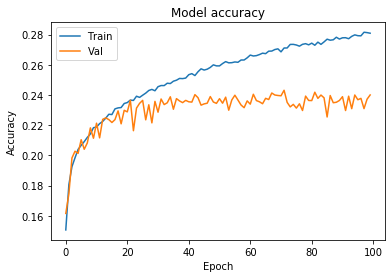

Accuracy
           0
0   0.150659
1   0.180568
2   0.192525
3   0.198399
4   0.203951
..       ...
95  0.279232
96  0.279128
97  0.281512
98  0.281269
99  0.280868

[100 rows x 1 columns]


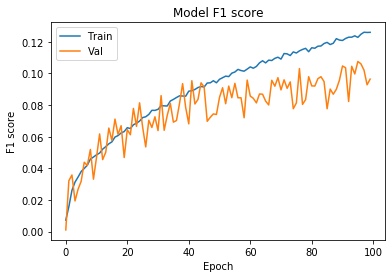

F1 score
           0
0   0.007217
1   0.015757
2   0.026073
3   0.031267
4   0.034489
..       ...
95  0.122830
96  0.124796
97  0.126067
98  0.125929
99  0.126005

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 22us/step
---TEST---
[2.525095653867221, 0.24223776161670685, 0.09394080936908722]


In [19]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,9,"../music/music/tagged_feature_sets/msd-jmirderivatives_dev/msd-jmirderivatives_dev.csv") 

Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 4s 34us/step - loss: 2.6887 - accuracy: 0.1892 - f1: 0.0522 - val_loss: 2.5849 - val_accuracy: 0.2168 - val_f1: 0.0601
Epoch 2/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.5367 - accuracy: 0.2280 - f1: 0.0810 - val_loss: 2.4950 - val_accuracy: 0.2413 - val_f1: 0.0935
Epoch 3/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.4912 - accuracy: 0.2409 - f1: 0.0896 - val_loss: 2.4732 - val_accuracy: 0.2453 - val_f1: 0.0942
Epoch 4/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.4647 - accuracy: 0.2470 - f1: 0.0936 - val_loss: 2.4674 - val_accuracy: 0.2504 - val_f1: 0.0877
Epoch 5/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.4441 - accuracy: 0.2536 - f1: 0.0974 - val_loss: 2.4644 - val_accuracy: 0.2504 - val_f1: 0.0994
Epoch 6/100
114915/114915 [======================

114915/114915 [==============================] - 4s 32us/step - loss: 2.2140 - accuracy: 0.3109 - f1: 0.1708 - val_loss: 2.3497 - val_accuracy: 0.2841 - val_f1: 0.1616
Epoch 47/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.2146 - accuracy: 0.3126 - f1: 0.1713 - val_loss: 2.3643 - val_accuracy: 0.2826 - val_f1: 0.1632
Epoch 48/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.2113 - accuracy: 0.3136 - f1: 0.1726 - val_loss: 2.3412 - val_accuracy: 0.2869 - val_f1: 0.1459
Epoch 49/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.2079 - accuracy: 0.3149 - f1: 0.1729 - val_loss: 2.3480 - val_accuracy: 0.2881 - val_f1: 0.1655
Epoch 50/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.2060 - accuracy: 0.3158 - f1: 0.1748 - val_loss: 2.3389 - val_accuracy: 0.2902 - val_f1: 0.1659
Epoch 51/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.2034 - accuracy: 0.3158

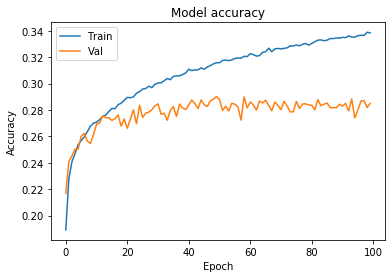

Accuracy
           0
0   0.189192
1   0.228003
2   0.240926
3   0.246983
4   0.253579
..       ...
95  0.336275
96  0.336649
97  0.336466
98  0.338911
99  0.338433

[100 rows x 1 columns]


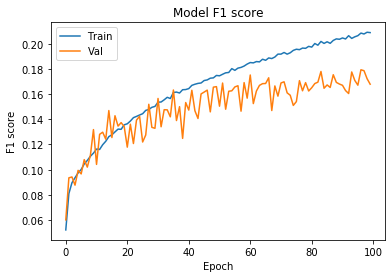

F1 score
           0
0   0.052163
1   0.081025
2   0.089574
3   0.093587
4   0.097404
..       ...
95  0.206386
96  0.208437
97  0.207726
98  0.209110
99  0.208819

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 23us/step
---TEST---
[2.4037172582420316, 0.2806939482688904, 0.1647198349237442]


In [20]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,10,"../music/music/tagged_feature_sets/msd-marsyas_dev_new/msd-marsyas_dev_new.csv") 